In [8]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### TODO

1. Read raw dataset
2. Make it prettier
3. I am too lazy to experiment with feature tranformations
4. Feature engineering (create equation_density, image_density and delete their parents)
5. Save dataset ready for modelling

In [9]:
# Read raw ds
raw_data = pd.read_csv('raw_data_gen/raw_features.csv')

In [10]:
raw_data.head(3)

,Unnamed: 0,name_x,market_cap,number_pages,number_images,number_characters,number_equations
0,0,Bitcoin,1206547874874,9,0,21807,80
1,1,Ethereum,320467809737,42,6,88334,22
2,2,Tether,115641341009,20,4,39064,8


In [11]:
# Clean it up a bit
raw_data_clean = raw_data.drop(['Unnamed: 0', 'name_x'], axis=1)

In [12]:
# Copy df
raw_data_new_ft = raw_data_clean.copy()
# Add density features
for data_type in ['images', 'characters', 'equations']:
    raw_data_new_ft[f'{data_type}_density'] = raw_data_new_ft.apply(lambda row: row[f'number_{data_type}']/row['number_pages'], axis=1)
# Drop parent features
raw_data_new_ft = raw_data_new_ft.drop(['number_images', 'number_characters', 'number_equations'], axis=1)

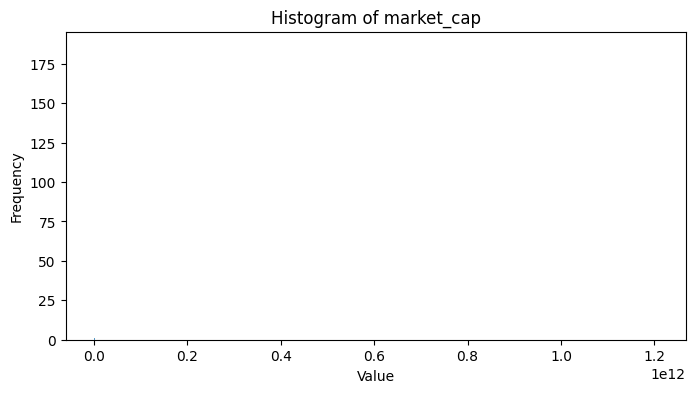

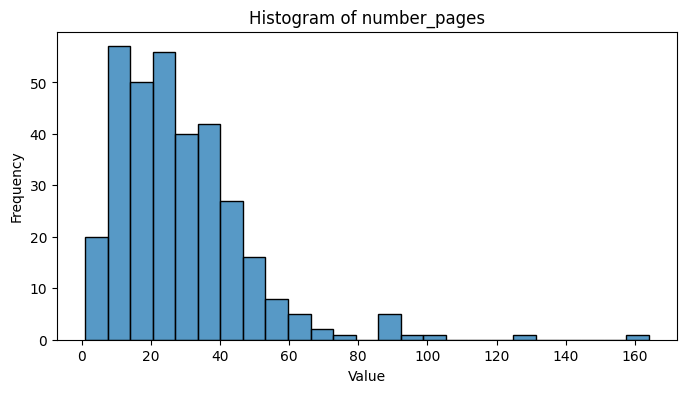

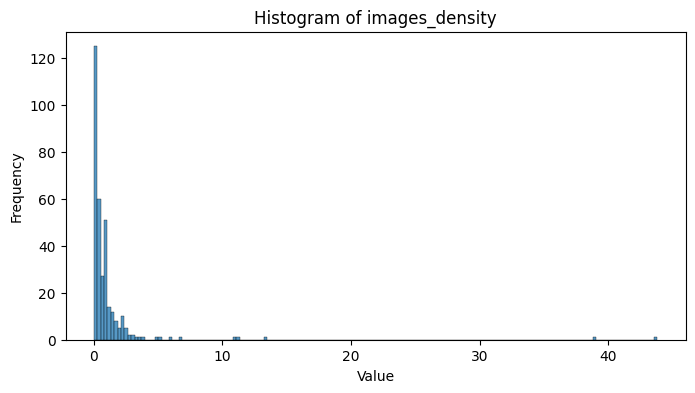

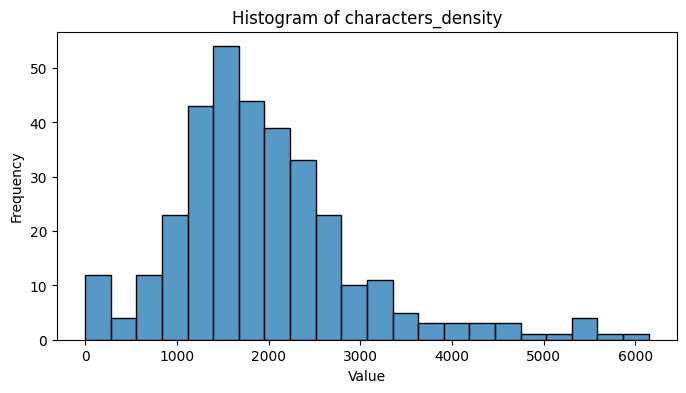

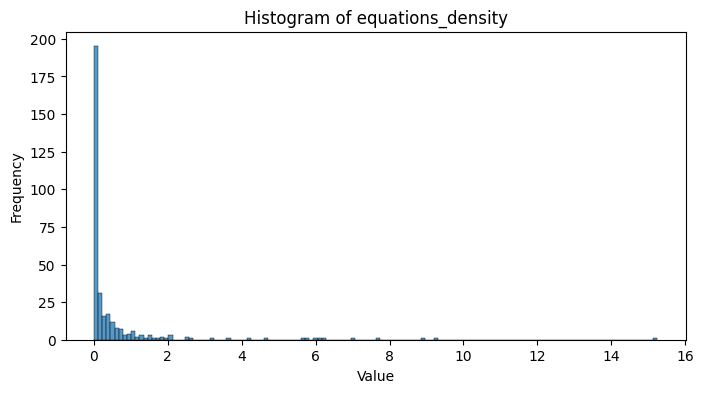

<Axes: >

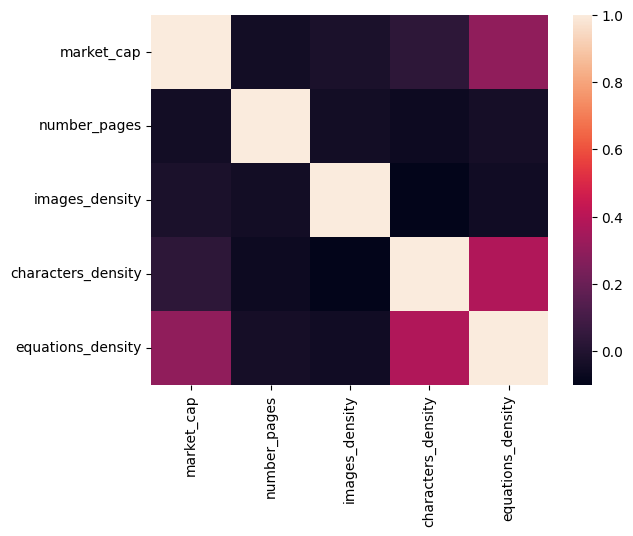

In [13]:
# See the new features

# Get numerical columns to plot
num_cols = [col for col in raw_data_new_ft.columns if raw_data_new_ft[col].dtype != 'object']
# Hist plot
for column in num_cols:
    plt.figure(figsize=(8, 4))  # Set the size of each subplot
    sns.histplot(raw_data_new_ft[column], kde=False)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
# Correlation
sns.heatmap(raw_data_new_ft[num_cols].corr())

In [14]:
# Save new df ready for modelling
raw_data_new_ft.to_csv('ml_data_set.csv', index=False)